# Depth of Field Analysis

Adapted from Kenton's code

Look at variation with aperture, and plot in 3D

In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

from scipy.fft import fft2,fftshift, fftfreq

In [2]:
PATH_TO_IMAGE =  '../data_store/2022-10-21 grating contd/f6_grating_stack_good/MMStack_Pos0.ome.tif/MMStack_Pos0.ome.tif'

In [3]:
A = [7, 8, 9, 10, 10.5, 11, 11.5, 12, 12.5, 13, 13.5, 14, 15, 15.5, 16, 17]
B = [7, 8, 9, 10, 10.5, 11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5, 16, 17]
C = [9, 10, 11, 12, 13, 14, 15, 16, 16.5, 17, 17.5, 18, 18.5, 19, 20, 21]

In [4]:
def add_position_labels(axes, slices, positions):
    """
    Given 2x2 subplot axes intended to display each quartile
    image from a stack, apply the appropriate titles
    from a list of positions of stack images in mm. 
    """
    
    axes[0][0].set_title(f'{positions[0]} mm')
    axes[0][1].set_title(f'{positions[slices//4]} mm')
    axes[1][0].set_title(f'{positions[slices//2]} mm')
    axes[1][1].set_title(f'{positions[(slices*3)//4]} mm')
    
    return axes


def load_disp_img(path, positions, x_min=300, x_max=800, y_min=300, y_max=600):
    """
    Load, crop and display quartile images from stack
    """
    
    im = io.imread(PATH_TO_IMAGE)[:, x_min:x_max, y_min:y_max]
    
    f, axes = plt.subplots(2,2)
    slices = len(im)
    
    axes[0][0].imshow(im[0], cmap='gray')
    axes[0][1].imshow(im[slices//4], cmap='gray')
    axes[1][0].imshow(im[slices//2], cmap='gray')
    axes[1][1].imshow(im[(slices*3)//4], cmap='gray')
    
    axes = add_position_labels(axes, slices, positions)

    plt.tight_layout()
    plt.show()
    return im

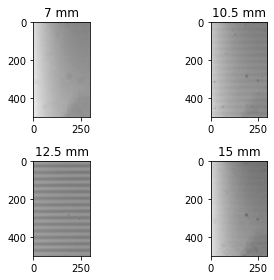

In [5]:
im = load_disp_img(PATH_TO_IMAGE, A)

In [6]:
def line_prof_splash(im, positions):
    """
    Plot vertical line profiles through centre,
    for quartile images in stack
    """
    
    f, axes = plt.subplots(2,2,figsize=(15, 15))
    slices = len(im)
    centre = im.shape[2]//2
    
    axes[0][0].plot(im[0,:,centre])
    axes[0][1].plot(im[slices//4,:,centre])
    axes[1][0].plot(im[slices//2,:,centre])
    axes[1][1].plot(im[(slices*3)//4,:,centre])
    
    axes = add_position_labels(axes, slices, positions)

    plt.show()

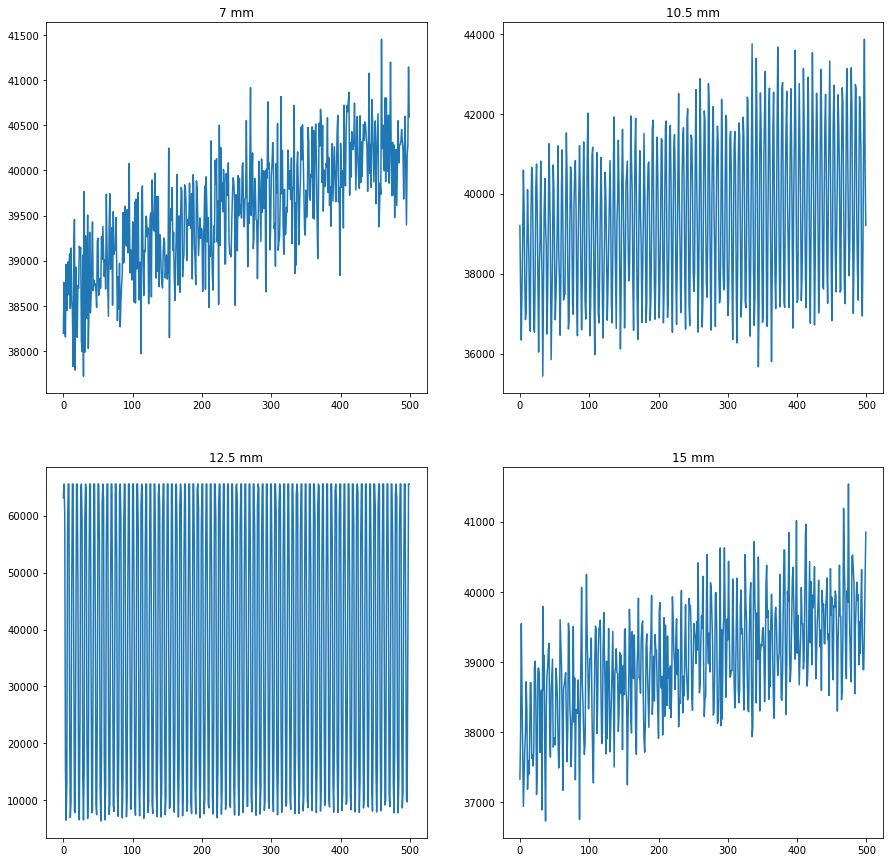

In [7]:
line_prof_splash(im, A)

---

Text(0.5, 0, 'x Frequency (cycle per pixel)')

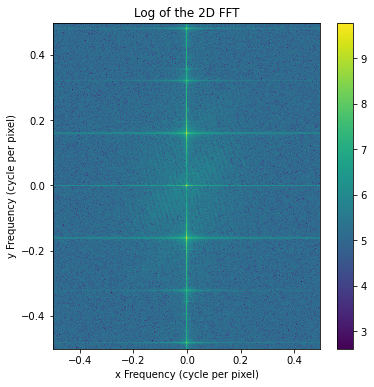

In [5]:
# Take FFT
ft = fftshift(fft2(im))
ft_log = np.log10(np.abs(ft))

length_per_pixel = 1

plt.figure(figsize=(6,6))
plt.title('Log of the 2D FFT')
x_size = ft.shape[0]
y_size = ft.shape[1]
x_freqs = fftshift(fftfreq(x_size, d = length_per_pixel)) 
y_freqs = fftshift(fftfreq(y_size, d = length_per_pixel) )
X,Y = np.meshgrid(x_freqs, y_freqs)

plt.pcolormesh(Y, X, ft_log.T, shading='auto')
plt.colorbar()
plt.ylabel('y Frequency (cycle per pixel)')
plt.xlabel('x Frequency (cycle per pixel)')

Text(0.5, 0, 'Frequencies (cycle per pixel)')

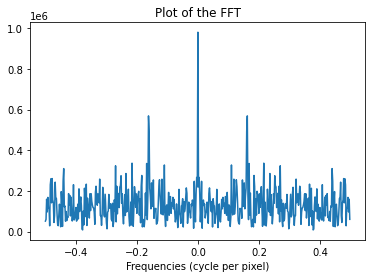

In [6]:
plt.title('Plot of the FFT')
plt.plot(x_freqs, (np.abs(ft)[:,0]), ls='-')
plt.xlabel('Frequencies (cycle per pixel)')

Text(0.5, 0, 'Frequencies (cycle per pixel)')

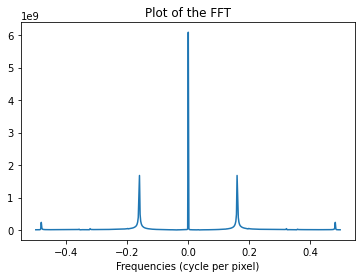

In [7]:
plt.title('Plot of the FFT')
plt.plot(x_freqs, (np.abs(ft)[:,y_size//2]), ls='-')
plt.xlabel('Frequencies (cycle per pixel)')

# Analysis
* Applied to a stack of images

(17, 500, 300)


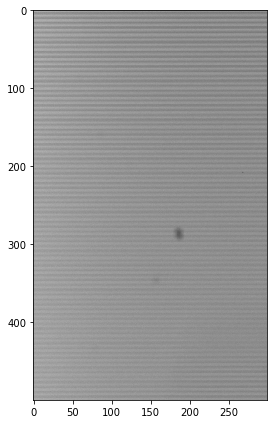

In [8]:
AIR_IMAGE_PATH =  '../data_store/20221023/f6_stack_air.tif'
im = io.imread(AIR_IMAGE_PATH)[:, 300:800, 300:600]
plt.figure(figsize=(6,6))
io.imshow(im[11])
print(im.shape)

In [9]:
x_size = im.shape[2]
y_size = im.shape[1]

In [10]:
ft_stack = fftshift(fft2(im), axes=[-1,-2])
ft_abs = np.abs(ft_stack)
ft_log = np.log10(ft_abs)

An example of the 2D FFT

Text(0.5, 0, 'x Frequency (cycle per pixel)')

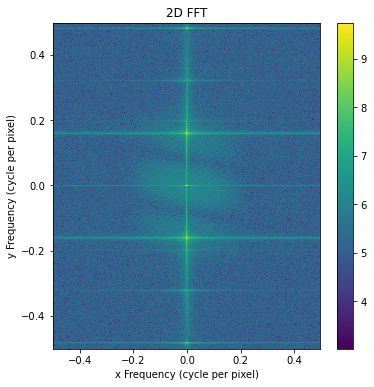

In [11]:
plt.figure(figsize=(6,6))
plt.title('2D FFT')

x_freqs = fftshift(fftfreq(x_size, d = length_per_pixel)) 
y_freqs = fftshift(fftfreq(y_size, d = length_per_pixel) )
X,Y = np.meshgrid(x_freqs, y_freqs)

plt.pcolormesh(X,Y,ft_log[7], shading='auto')
plt.colorbar()
plt.ylabel('y Frequency (cycle per pixel)')
plt.xlabel('x Frequency (cycle per pixel)')


Plot out several frequencies for inspection

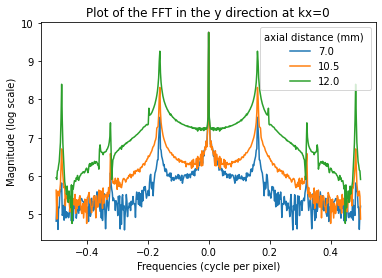

In [12]:
plt.title('Plot of the FFT in the y direction at kx=0')
air_range = np.array([7, 8, 9, 10, 10.5, 11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5, 16, 17])

def plot_line(idx):
    data = ft_log[idx,:, x_size//2]
    plt.plot(y_freqs, data, label=air_range[idx])

plot_line(0)
plot_line(4)
plot_line(7)

plt.xlabel('Frequencies (cycle per pixel)')
plt.ylabel('Magnitude (log scale)')
plt.legend(title='axial distance (mm) ')

Plot all the frequencies

Text(0, 0.5, 'Magnitude')

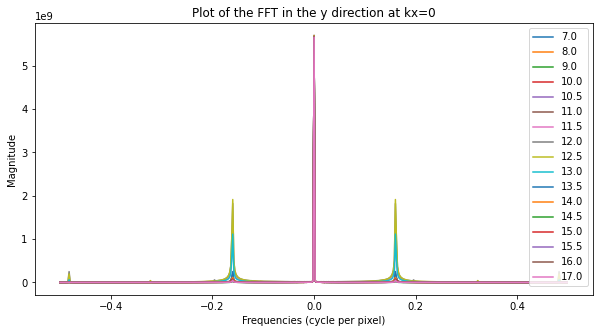

In [13]:
plt.figure(figsize=(10,5))
plt.title('Plot of the FFT in the y direction at kx=0')

plt.plot( y_freqs, (np.moveaxis(np.abs(ft_stack[:,:, x_size//2]), 0, -1)), label=air_range)
plt.legend()
plt.xlabel('Frequencies (cycle per pixel)')
plt.ylabel('Magnitude')